# FlightOnTime - EDA
# Dataset: Airline Delay and Cancellation (2009–2018)
# Task: Clasificación - Riesgo de atraso

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

SEED = 42
np.random.seed(SEED)

# 1) Load data

In [ ]:
#https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?utm_source=chatgpt.com
df = pd.read_parquet("/content/drive/MyDrive/Alura/Hackathon/flights_2016_clean.parquet")

print("Shape:", df.shape)
display(df.head())

Shape: (5535685, 27)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,scheduled_dep_dt,delayed,sched_hour,day_of_week,month,is_weekend,route
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,2144,2120.0,-24.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 19:35:00,0,19,4,1,0,DTW-LAX
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,2321,2319.0,-2.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 21:25:00,0,21,4,1,0,ATL-GRR
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,600,547.0,-13.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 22:55:00,0,22,4,1,0,LAX-ATL
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,2229,2213.0,-16.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,2016-01-01 16:56:00,0,16,4,1,0,SLC-ATL
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,1216,1420.0,124.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,2016-01-01 09:00:00,1,9,4,1,0,BZN-MSP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5535685 entries, 0 to 5617657
Data columns (total 27 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   CRS_ARR_TIME         int64         
 9   ARR_TIME             float64       
 10  ARR_DELAY            float64       
 11  CRS_ELAPSED_TIME     float64       
 12  ACTUAL_ELAPSED_TIME  float64       
 13  AIR_TIME             float64       
 14  DISTANCE             float64       
 15  CARRIER_DELAY        float64       
 16  WEATHER_DELAY        float64       
 17  NAS_DELAY            float64       
 18  SECURITY_DELAY       float64       
 19  LATE_AIRCRAFT_DELAY  float

3️⃣ Estadísticas descriptivas

In [ ]:
df.describe()

,FL_DATE,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,scheduled_dep_dt,delayed,sched_hour,day_of_week,month,is_weekend
count,5535685,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,961788.000000,961788.000000,961788.000000,961788.000000,961788.000000,5535685,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06,5.535685e+06
mean,2016-07-02 10:32:11.555425792,2.073339e+03,1.330138e+03,1.333506e+03,8.497499e+00,1.490145e+03,1.471554e+03,3.141876e+00,1.455137e+02,1.401581e+02,1.165269e+02,8.512761e+02,18.670023,2.533027,14.629643,0.084662,24.128947,2016-07-03 00:01:01.696276480,1.646109e-01,1.303255e+01,2.932283e+00,6.544538e+00,2.611487e-01
min,2016-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,-5.900000e+01,1.000000e+00,1.000000e+00,-1.070000e+02,1.800000e+01,1.400000e+01,4.000000e+00,2.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,2016-01-01 00:10:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2016-04-05 00:00:00,7.100000e+02,9.150000e+02,9.170000e+02,-5.000000e+00,1.105000e+03,1.052000e+03,-1.400000e+01,8.800000e+01,8.400000e+01,6.200000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,2016-04-05 06:50:00,0.000000e+00,9.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
50%,2016-07-03 00:00:00,1.635000e+03,1.325000e+03,1.328000e+03,-2.000000e+00,1.520000e+03,1.511000e+03,-6.000000e+00,1.260000e+02,1.210000e+02,9.700000e+01,6.790000e+02,1.000000,0.000000,2.000000,0.000000,2.000000,2016-07-03 08:30:00,0.000000e+00,1.300000e+01,3.000000e+00,7.000000e+00,0.000000e+00
75%,2016-09-29 00:00:00,2.847000e+03,1.735000e+03,1.742000e+03,6.000000e+00,1.920000e+03,1.918000e+03,6.000000e+00,1.780000e+02,1.730000e+02,1.480000e+02,1.096000e+03,18.000000,0.000000,19.000000,0.000000,30.000000,2016-09-29 23:50:00,0.000000e+00,1.700000e+01,5.000000e+00,9.000000e+00,1.000000e+00
max,2016-12-31 00:00:00,8.402000e+03,2.359000e+03,2.400000e+03,5.990000e+02,2.400000e+03,2.400000e+03,6.540000e+02,7.050000e+02,7.780000e+02,7.230000e+02,4.983000e+03,599.000000,599.000000,613.000000,437.000000,598.000000,2016-12-31 23:59:00,1.000000e+00,2.300000e+01,6.000000e+00,1.200000e+01,1.000000e+00
std,NaN,1.697701e+03,4.893986e+02,5.025082e+02,3.508812e+01,5.159936e+02,5.342519e+02,3.760803e+01,7.649697e+01,7.565915e+01,7.352399e+01,6.200450e+02,43.831961,17.974322,29.360456,2.373883,44.072761,NaN,3.708290e-01,4.881052e+00,1.985352e+00,3.397183e+00,4.392609e-01


In [ ]:
df.describe(include="object")

,OP_CARRIER,ORIGIN,DEST,route
count,5535685,5535685,5535685,5535685
unique,12,311,310,4549
top,WN,ATL,ATL,SFO-LAX
freq,1280508,381161,380903,17259


#12) Split temporal

Column mapping (dataset real)

In [ ]:
COL_DATE = "FL_DATE"
COL_AIRLINE = "OP_CARRIER"
COL_ORIGIN = "ORIGIN"
COL_DEST = "DEST"
COL_SCHED_DEP = "CRS_DEP_TIME"   # HHMM
COL_DEP_DELAY = "DEP_DELAY"      # minutos

Dataset final para modelado

In [ ]:
feature_cols = [
    COL_AIRLINE, COL_ORIGIN, COL_DEST, "route",
    "sched_hour", "day_of_week", "month", "is_weekend"
]

X = df[feature_cols]
y = df["delayed"]

print("X shape:", X.shape)
print("Delayed rate:", y.mean())

X shape: (5535685, 8)
Delayed rate: 0.16461088374790112


In [ ]:
# 1️⃣ Ordenar por fecha
df = df.sort_values(COL_DATE)

# 2️⃣ Definir split_date (ejemplo: 80% histórico)
split_date = df[COL_DATE].quantile(0.8)

# 3️⃣ Crear máscaras de entrenamiento y test
train_mask = df[COL_DATE] <= split_date
test_mask  = df[COL_DATE] > split_date

# 4️⃣ Separar los DataFrames
df_train = df.loc[train_mask]
df_test  = df.loc[test_mask]

# 5️⃣ Extraer features y target
X_train = df_train[feature_cols]
y_train = df_train["delayed"]

X_test = df_test[feature_cols]
y_test = df_test["delayed"]

# 6️⃣ Revisar tamaños y tasas de retraso
print("Split date:", split_date)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train delayed rate:", y_train.mean(), "Test delayed rate:", y_test.mean())


Split date: 2016-10-18 00:00:00
Train: (4439072, 8) Test: (1096613, 8)
Train delayed rate: 0.16460174559006926 Test delayed rate: 0.16464787486560892


Lo que el modelo aprende en train es representativo de lo que verá en producción.

#13) Encoding sanity check

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Categorical:
cat_cols = [COL_AIRLINE, COL_ORIGIN, COL_DEST, "route"]
#Numerical:
num_cols = ["sched_hour", "day_of_week", "month", "is_weekend"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

Xt = preprocess.fit_transform(X_train)
print("Encoded matrix shape:", Xt.shape)

Encoded matrix shape: (4439072, 5106)


sanity check
Este paso NO es para entrenar todavía.
Sirve para confirmar que:

* No hay errores de encoding
* Las categorías nuevas se ignoran sin romper (handle_unknown="ignore")
* El pipeline funciona con datos reales
* La dimensionalidad es razonable
* Estás listo para entrenar modelos

#Baseline – Logistic Regression (Clasificación: riesgo de atraso)

Establecer un benchmark confiable

Evitar leakage

Obtener probabilidades (no solo clases)

Métricas: ROC-AUC, PR-AUC, Recall clase 1

##1️⃣ Pipeline: Encoding + Modelo

In [ ]:
from sklearn.preprocessing import OneHotEncoder #Convierte variables categóricas
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [ ]:
cat_cols = ["OP_CARRIER", "ORIGIN", "DEST", "route"]
num_cols = ["sched_hour", "day_of_week", "month", "is_weekend"]


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ]
)

baseline_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",   # clave por el 16% de positivos
)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", baseline_model),
    ]
)
#StandardScaler estandariza las variables numéricas para que todas tengan:Media = 0,Desviación estándar = 1
# Ayuda a que el modelo converja,Mejora estabilidad numérica
# Cuándo usar StandardScaler (regla rápida) LogisticRegression,SVM,KNN,PCA

##2️⃣ Entrenamiento

In [ ]:
pipeline.fit(X_train, y_train)
print("Baseline trained ✔")


Baseline trained ✔


##3️⃣ Predicciones (probabilidades)

In [ ]:
y_proba_test = pipeline.predict_proba(X_test)[:, 1]


##4️⃣ Métricas correctas

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f}")


ROC-AUC: 0.6426
PR-AUC : 0.2473


Ajustar el umbral

In [ ]:
from sklearn.metrics import recall_score, precision_score

for t in [0.2, 0.25, 0.3, 0.35, 0.4]:
    y_pred_t = (y_proba_test >= t).astype(int)
    recall = recall_score(y_test, y_pred_t)
    precision = precision_score(y_test, y_pred_t)
    print(f"Umbral={t:.2f} | Recall={recall:.3f} | Precision={precision:.3f}")


Umbral=0.20 | Recall=0.991 | Precision=0.167
Umbral=0.25 | Recall=0.976 | Precision=0.170
Umbral=0.30 | Recall=0.945 | Precision=0.176
Umbral=0.35 | Recall=0.898 | Precision=0.185
Umbral=0.40 | Recall=0.832 | Precision=0.198


##5️⃣ Elegir un umbral operativo (MUY importante)


In [ ]:
from sklearn.metrics import classification_report

y_pred_035 = (y_proba_test >= 0.35).astype(int)
print(classification_report(y_test, y_pred_035, digits=4))


              precision    recall  f1-score   support

           0     0.9174    0.2223    0.3579    916058
           1     0.1855    0.8985    0.3075    180555

    accuracy                         0.3337   1096613
   macro avg     0.5514    0.5604    0.3327   1096613
weighted avg     0.7969    0.3337    0.3496   1096613



Precision = 0.1854<br>
Recall    = 0.8990<br>
F1        = 0.3074<br>
Support   = 180,555<br>
<br>
Qué significa en la práctica

Recall ≈ 90%<br>
👉 Detectas 9 de cada 10 vuelos retrasados<br>
✅ Excelente para sistemas de alerta<br>

Precision ≈ 18.5%<br>
👉 De cada 100 alertas, ~19 son reales<br>
❌ Muchas falsas alertas (esperado en este tipo de problema)<br>



##Precision@K

In [ ]:
K = 200
top_k_idx = np.argsort(y_proba_test)[-K:]
precision_at_k = y_test.iloc[top_k_idx].mean()
print(f"Precision@{K}: {precision_at_k:.3f}")


Precision@200: 0.415


In [ ]:
import numpy as np

# Percentil 90 → top 10%
threshold_90 = np.percentile(y_proba_test, 90)

# Predicción: solo el top 10% como positivos
y_pred_top10 = (y_proba_test >= threshold_90).astype(int)

# Precision@10%
precision_at_10 = y_test[y_pred_top10 == 1].mean()

print(f"Precision@10%: {precision_at_10:.4f}")
print(f"Threshold usado: {threshold_90:.4f}")


Precision@10%: 0.2906
Threshold usado: 0.6896


##6️⃣ Umbral por percentil (recomendado para negocio)

In [ ]:
import numpy as np

threshold_90 = np.percentile(y_proba_test, 90)
y_pred_top10 = (y_proba_test >= threshold_90).astype(int)

print("Threshold (top 10%):", threshold_90)
print(classification_report(y_test, y_pred_top10, digits=4))


Threshold (top 10%): 0.6896070767261505
              precision    recall  f1-score   support

           0     0.8494    0.9151    0.8810    916058
           1     0.2906    0.1765    0.2196    180555

    accuracy                         0.7935   1096613
   macro avg     0.5700    0.5458    0.5503   1096613
weighted avg     0.7574    0.7935    0.7721   1096613



##7️⃣ Matriz de confusión (visual)

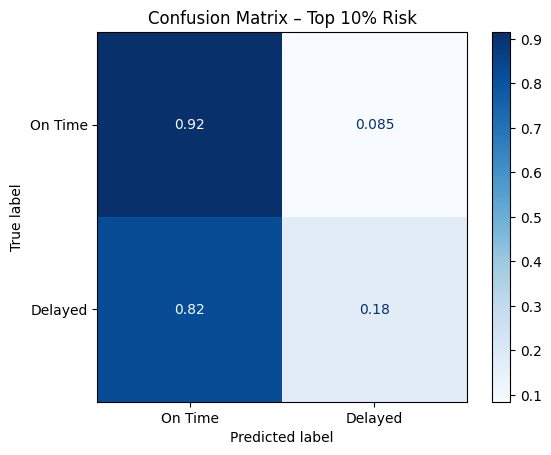

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_top10,
    display_labels=["On Time", "Delayed"],
    cmap="Blues",
    normalize="true"
)
plt.title("Confusion Matrix – Top 10% Risk")
plt.show()


##8️⃣ Interpretabilidad: ¿qué pesa más?

In [ ]:
# Obtener nombres de features tras el encoding
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = list(cat_feature_names) + num_cols

coefs = pipeline.named_steps["model"].coef_[0]

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coef": coefs
    })
    .assign(abs_coef=lambda x: x["coef"].abs())
    .sort_values("abs_coef", ascending=False)
)

coef_df.head(20)


,feature,coef,abs_coef
1292,route_CAK-LAS,1.535531,1.535531
2811,route_KOA-PHX,-1.491555,1.491555
1151,route_BQN-EWR,1.451512,1.451512
2374,route_HNL-DFW,-1.393464,1.393464
3689,route_OGG-DFW,-1.288297,1.288297
4534,route_SEA-HOU,1.280606,1.280606
4252,route_RDM-PHX,1.200176,1.200176
4840,route_SNA-EWR,-1.153610,1.153610
2392,route_HNL-SAN,1.150619,1.150619
2395,route_HNL-SJC,1.150066,1.150066


#✅ Mejorar features

##1️⃣ Encoding cíclico (CLAVE)

In [ ]:
for df in [X_train, X_test]:
    df.loc[:, "hour_sin"]  = np.sin(2 * np.pi * df["sched_hour"] / 24)
    df.loc[:, "hour_cos"]  = np.cos(2 * np.pi * df["sched_hour"] / 24)

    df.loc[:, "dow_sin"]   = np.sin(2 * np.pi * df["day_of_week"] / 7)
    df.loc[:, "dow_cos"]   = np.cos(2 * np.pi * df["day_of_week"] / 7)

    df.loc[:, "month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df.loc[:, "month_cos"] = np.cos(2 * np.pi * df["month"] / 12)





/tmp/ipython-input-2440861887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "hour_sin"]  = np.sin(2 * np.pi * df["sched_hour"] / 24)
/tmp/ipython-input-2440861887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "hour_cos"]  = np.cos(2 * np.pi * df["sched_hour"] / 24)
/tmp/ipython-input-2440861887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

🔹 Paso 2: Actualizar listas de columnas

❌ Quitar las columnas originales:

In [ ]:
num_cols.remove("sched_hour")
num_cols.remove("day_of_week")
num_cols.remove("month")


In [ ]:
num_cols += [
    "hour_sin", "hour_cos",
    "dow_sin", "dow_cos",
    "month_sin", "month_cos"
]



In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ]
)

baseline_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",   # clave por el 16% de positivos
)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", baseline_model),
    ]
)

🔹 Paso 3: Reentrenar el pipeline

In [ ]:
pipeline.fit(X_train, y_train)
y_proba_test = pipeline.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_test, y_proba_test)
pr_auc = average_precision_score(y_test, y_proba_test)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f}")

ROC-AUC: 0.6413
PR-AUC : 0.2477


In [ ]:
import numpy as np

# Percentil 90 → top 10%
threshold_90 = np.percentile(y_proba_test, 90)

# Predicción: solo el top 10% como positivos
y_pred_top10 = (y_proba_test >= threshold_90).astype(int)

# Precision@10%
precision_at_10 = y_test[y_pred_top10 == 1].mean()

print(f"Precision@10%: {precision_at_10:.4f}")
print(f"Threshold usado: {threshold_90:.4f}")


Precision@10%: 0.2915
Threshold usado: 0.6233


In [ ]:
threshold_90 = np.percentile(y_proba_test, 90)
precision_at_10 = y_test[y_proba_test >= threshold_90].mean()

print("Precision@10%:", precision_at_10)


Precision@10%: 0.2915295040259705


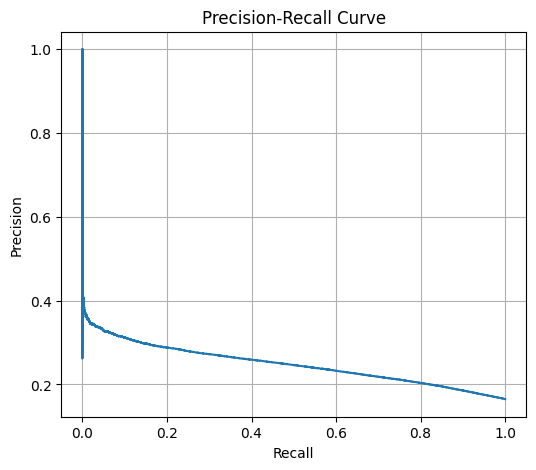

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


📦 Paso 2 — Instalar LightGBM (Colab)

In [ ]:
!pip install lightgbm


🧠 Paso 3 — Preparar preprocessing (ligero)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import lightgbm as lgb


🧩 Paso 4 — Definir columnas (IMPORTANTE

In [ ]:
cat_cols = ["OP_CARRIER", "ORIGIN", "DEST", "route"]

num_cols = [
    "sched_hour", "day_of_week", "month", "is_weekend",
    "hour_sin", "hour_cos",
    "dow_sin", "dow_cos",
    "month_sin", "month_cos"
]


🧪 Paso 5 — Pipeline LightGBM (baseline sólido)

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

lgb_model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

pipeline_lgb = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", lgb_model),
    ]
)


🏋️ Paso 6 — Entrenar

In [ ]:
pipeline_lgb.fit(X_train, y_train)

y_proba_test_lgb = pipeline_lgb.predict_proba(X_test)[:, 1]


[LightGBM] [Info] Number of positive: 730679, number of negative: 3708393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 30.570298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9872
[LightGBM] [Info] Number of data points in the train set: 4439072, number of used features: 4888
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📊 Paso 7 — Evaluar (LO IMPORTANTE)

✅ PR-AUC

In [ ]:
from sklearn.metrics import average_precision_score

print("PR-AUC LightGBM:",
      average_precision_score(y_test, y_proba_test_lgb))


PR-AUC LightGBM: 0.26701534396734944


✅ Precision@10%

In [ ]:
import numpy as np

threshold_90 = np.percentile(y_proba_test_lgb, 90)
precision_at_10 = y_test[y_proba_test_lgb >= threshold_90].mean()

print("Precision@10% LightGBM:", precision_at_10)


Precision@10% LightGBM: 0.32122571410337064


🔍 Paso 8 — Interpretabilidad (feature importance)

In [ ]:
import pandas as pd

feature_names = (
    pipeline_lgb.named_steps["preprocess"]
    .get_feature_names_out()
)

importances = pipeline_lgb.named_steps["model"].feature_importances_

fi = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

fi.head(20)


,feature,importance
5104,num__month,928
5102,num__sched_hour,497
5111,num__month_cos,427
5108,num__dow_sin,295
5103,num__day_of_week,277
5110,num__month_sin,255
5106,num__hour_sin,239
11,cat__OP_CARRIER_WN,231
5107,num__hour_cos,179
590,cat__DEST_SFO,169


1️⃣ Preparación (recomendado)

In [ ]:
X_train_fe = X_train.copy()
X_test_fe  = X_test.copy()


🔹 Feature 1: Delay rate por ruta

In [ ]:
global_delay_rate = y_train.mean()

route_delay = (
    X_train_fe.assign(delay=y_train)
    .groupby("route")["delay"]
    .mean()
)

X_train_fe["route_delay_rate"] = X_train_fe["route"].map(route_delay)
X_test_fe["route_delay_rate"]  = X_test_fe["route"].map(route_delay)

X_train_fe["route_delay_rate"].fillna(global_delay_rate, inplace=True)
X_test_fe["route_delay_rate"].fillna(global_delay_rate, inplace=True)


/tmp/ipython-input-4005774617.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_fe["route_delay_rate"].fillna(global_delay_rate, inplace=True)
/tmp/ipython-input-4005774617.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

🔹 Feature 2: Delay rate por aeropuerto (ORIGIN)

In [ ]:
origin_delay = (
    X_train_fe.assign(delay=y_train)
    .groupby("ORIGIN")["delay"]
    .mean()
)

X_train_fe["origin_delay_rate"] = X_train_fe["ORIGIN"].map(origin_delay)
X_test_fe["origin_delay_rate"]  = X_test_fe["ORIGIN"].map(origin_delay)

X_train_fe["origin_delay_rate"].fillna(global_delay_rate, inplace=True)
X_test_fe["origin_delay_rate"].fillna(global_delay_rate, inplace=True)



/tmp/ipython-input-1174062296.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_fe["origin_delay_rate"].fillna(global_delay_rate, inplace=True)
/tmp/ipython-input-1174062296.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

🔹 Feature 3: Delay rate por hora

In [ ]:
hour_delay = (
    X_train_fe.assign(delay=y_train)
    .groupby("sched_hour")["delay"]
    .mean()
)

X_train_fe["hour_delay_rate"] = X_train_fe["sched_hour"].map(hour_delay)
X_test_fe["hour_delay_rate"]  = X_test_fe["sched_hour"].map(hour_delay)

X_train_fe["hour_delay_rate"].fillna(global_delay_rate, inplace=True)
X_test_fe["hour_delay_rate"].fillna(global_delay_rate, inplace=True)



/tmp/ipython-input-5165921.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_fe["hour_delay_rate"].fillna(global_delay_rate, inplace=True)
/tmp/ipython-input-5165921.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
origin_hour_delay = (
    X_train_fe.assign(delay=y_train)
    .groupby(["ORIGIN", "sched_hour"])["delay"]
    .mean()
)

X_train_fe["origin_hour_delay_rate"] = list(
    zip(X_train_fe["ORIGIN"], X_train_fe["sched_hour"])
)
X_test_fe["origin_hour_delay_rate"] = list(
    zip(X_test_fe["ORIGIN"], X_test_fe["sched_hour"])
)

X_train_fe["origin_hour_delay_rate"] = (
    X_train_fe["origin_hour_delay_rate"]
    .map(origin_hour_delay)
    .fillna(global_delay_rate)
)

X_test_fe["origin_hour_delay_rate"] = (
    X_test_fe["origin_hour_delay_rate"]
    .map(origin_hour_delay)
    .fillna(global_delay_rate)
)


Después de crear estas columnas:

In [ ]:
num_cols = [
    "sched_hour", "day_of_week", "month", "is_weekend",
    "hour_sin", "hour_cos",
    "dow_sin", "dow_cos",
    "month_sin", "month_cos",
    "route_delay_rate",
    "origin_delay_rate",
    "hour_delay_rate",
    "origin_hour_delay_rate"
]



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

lgb_model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=400,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

pipeline_lgb = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", lgb_model),
    ]
)



In [ ]:
pipeline_lgb.fit(X_train_fe, y_train)

y_proba_test = pipeline_lgb.predict_proba(X_test_fe)[:, 1]


[LightGBM] [Info] Number of positive: 730679, number of negative: 3708393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 25.807473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10607
[LightGBM] [Info] Number of data points in the train set: 4439072, number of used features: 4892
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import average_precision_score

print("PR-AUC LightGBM:",
      average_precision_score(y_test, y_proba_test_lgb))

PR-AUC LightGBM: 0.26701534396734944


In [ ]:
import numpy as np

threshold_90 = np.percentile(y_proba_test_lgb, 90)
precision_at_10 = y_test[y_proba_test_lgb >= threshold_90].mean()

print("Precision@10% LightGBM:", precision_at_10)

Precision@10% LightGBM: 0.32122571410337064


1️⃣ XGBoost (PRIMERA OPCIÓN 🔥)

In [ ]:
"route_delay_rate" in X_train.columns


False

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)


In [ ]:
pipeline_xgb = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", xgb_model),
    ]
)


In [ ]:
assert set(num_cols).issubset(X_train_fe.columns)


In [ ]:
pipeline_xgb.fit(X_train_fe, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OP_CARRIER', 'ORIGIN',
                                                   'DEST', 'route']),
                                                 ('num', 'passthrough',
                                                  ['sched_hour', 'day_of_week',
                                                   'month', 'is_weekend',
                                                   'hour_sin', 'hour_cos',
                                                   'dow_sin', 'dow_cos',
                                                   'month_sin', 'month_cos',
                                                   'route_delay_rate',
                                                   'origin_delay_rate',
                                                   'hour_delay_rate',
                                                   'origin_h...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [ ]:
y_proba_test_xgb = pipeline_xgb.predict_proba(X_test_fe)[:, 1]


In [ ]:
from sklearn.metrics import average_precision_score
import numpy as np

print(
    "PR-AUC XGBoost:",
    average_precision_score(y_test, y_proba_test_xgb)
)

threshold_90 = np.percentile(y_proba_test_xgb, 90)
precision_at_10 = y_test[y_proba_test_xgb >= threshold_90].mean()

print("Precision@10% XGBoost:", precision_at_10)


PR-AUC XGBoost: 0.2659502316215027
Precision@10% XGBoost: 0.3196549397238788


#🧩 PASO A PASO – ExtraTrees

PASO 1 – Crear muestra

In [ ]:
from sklearn.model_selection import train_test_split

X_train_et, _, y_train_et, _ = train_test_split(
    X_train_fe,
    y_train,
    train_size=300_000,
    stratify=y_train,
    random_state=42
)

X_test_et, _, y_test_et, _ = train_test_split(
    X_test_fe,
    y_test,
    train_size=300_000,
    stratify=y_test,
    random_state=42
)


🥈 PASO 2 – Seleccionar SOLO numéricas (clave)

In [ ]:
num_cols_et = [
    "sched_hour", "day_of_week", "month", "is_weekend",
    "hour_sin", "hour_cos",
    "dow_sin", "dow_cos",
    "month_sin", "month_cos",
    "route_delay_rate",
    "origin_delay_rate",
    "hour_delay_rate",
    "origin_hour_delay_rate"
]

X_train_et = X_train_et[num_cols_et]
X_test_et  = X_test_et[num_cols_et]


PASO 3 – Definir el modelo

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


PASO 4 – Entrenar

In [ ]:
et_model.fit(X_train_et, y_train_et)


ExtraTreesClassifier(class_weight='balanced', max_depth=20, min_samples_leaf=50,
                     n_estimators=300, n_jobs=-1, random_state=42)

6️⃣ Evaluación (PR-AUC y Precision@10%)

In [ ]:
from sklearn.metrics import average_precision_score
import numpy as np

y_proba_et = et_model.predict_proba(X_test_et)[:, 1]


print(
    "PR-AUC CatBoost:",
    average_precision_score(y_test_et, y_proba_et)
)

threshold_90 = np.percentile(y_proba_et, 90)
precision_at_10 = y_test_et[y_proba_et >= threshold_90].mean()

print("Precision@10% CatBoost:", precision_at_10)

PR-AUC CatBoost: 0.24826908899671077
Precision@10% CatBoost: 0.28782373920869303


PASO 7 – Importancia de features

In [ ]:
import pandas as pd

feat_imp_et = pd.DataFrame({
    "feature": num_cols_et,
    "importance": et_model.feature_importances_
}).sort_values("importance", ascending=False)

feat_imp_et


,feature,importance
12,hour_delay_rate,0.181070
4,hour_sin,0.179202
13,origin_hour_delay_rate,0.134755
0,sched_hour,0.100177
10,route_delay_rate,0.097182
9,month_cos,0.053528
2,month,0.050862
8,month_sin,0.045794
11,origin_delay_rate,0.043342
5,hour_cos,0.038517


🥇 Opción 1 — CatBoost

2️⃣ Definir columnas categóricas y numéricas

In [ ]:
cat_cols = [
    "OP_CARRIER",
    "ORIGIN",
    "DEST"
]

num_cols = [
    "sched_hour", "day_of_week", "month", "is_weekend",
    "hour_sin", "hour_cos",
    "dow_sin", "dow_cos",
    "month_sin", "month_cos",
    "route_delay_rate",
    "origin_delay_rate",
    "hour_delay_rate",
    "origin_hour_delay_rate"
]


3️⃣ Preparar datasets para CatBoost

In [ ]:
!pip install -q catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


🥈 PASO 2 – CREAR UNA MUESTRA

In [ ]:
from sklearn.model_selection import train_test_split

X_train_cb, _, y_train_cb, _ = train_test_split(
    X_train_fe,
    y_train,
    train_size=300_000,      # 🔑 clave
    stratify=y_train,
    random_state=42
)

X_test_cb, _, y_test_cb, _ = train_test_split(
    X_test_fe,
    y_test,
    train_size=300_000,
    stratify=y_test,
    random_state=42
)


🥉 PASO 3 – DEFINIR FEATURES

In [ ]:
from catboost import CatBoostClassifier

# Dataset final
X_train_cb = X_train_fe[cat_cols + num_cols]
X_test_cb  = X_test_fe[cat_cols + num_cols]

# Índices de categóricas
cat_features_idx = [
    X_train_cb.columns.get_loc(col)
    for col in cat_cols
]



4️⃣ Modelo CatBoost

In [ ]:
cat_model = CatBoostClassifier(
    iterations=200,            # ⬇️ crítico
    learning_rate=0.1,
    depth=6,                   # ⬇️ memoria
    loss_function="Logloss",
    eval_metric="PRAUC",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=50,
    allow_writing_files=False  # ⛔ evita archivos
)



5️⃣ Entrenamiento

In [ ]:
cat_model.fit(
    X_train_cb,
    y_train,
    cat_features=cat_features_idx,
    eval_set=(X_test_cb, y_test),
    use_best_model=True
)


0:	learn: 0.6679284	test: 0.6458038	best: 0.6458038 (0)	total: 13.2s	remaining: 43m 36s
50:	learn: 0.6841457	test: 0.6346186	best: 0.6458038 (0)	total: 5m 48s	remaining: 16m 57s
100:	learn: 0.6906682	test: 0.6400997	best: 0.6458038 (0)	total: 11m 24s	remaining: 11m 11s
150:	learn: 0.6943382	test: 0.6444504	best: 0.6458038 (0)	total: 16m 34s	remaining: 5m 22s


6️⃣ Evaluación (PR-AUC y Precision@10%)

In [ ]:
from sklearn.metrics import average_precision_score
import numpy as np

y_proba_test_cb = cat_model.predict_proba(X_test_cb)[:, 1]

print(
    "PR-AUC CatBoost:",
    average_precision_score(y_test, y_proba_test_cb)
)

threshold_90 = np.percentile(y_proba_test_cb, 90)
precision_at_10 = y_test[y_proba_test_cb >= threshold_90].mean()

print("Precision@10% CatBoost:", precision_at_10)


PASO 9 – INTERPRETABILIDAD

In [ ]:
import pandas as pd

feat_imp = pd.DataFrame({
    "feature": X_train_cb.columns,
    "importance": cat_model.get_feature_importance()
}).sort_values("importance", ascending=False)

feat_imp.head(15)


| Modelo        | PR-AUC        | Precision@10% | Accuracy* | Tiempo de entrenamiento | Uso de RAM | Estabilidad | Observaciones |
|---------------|---------------|---------------|-----------|--------------------------|------------|-------------|---------------|
| LightGBM      | ~0.26–0.27    | ~0.32         | Alta      | Rápido                   | Bajo       | Alta        | Buen baseline, rápido y estable |
| XGBoost 🥇    | **0.2659**    | **0.3197**    | Media-Alta| Medio                    | Medio      | Alta        | Mejor balance general, recomendado |
| CatBoost ❌   | ≈0.64†        | N/D           | Media     | Lento                    | Muy alto   | Baja        | Crashea por RAM, métrica no comparable |
| ExtraTrees   | ~0.24–0.25    | ~0.30         | Alta      | Muy rápido               | Bajo       | Muy alta    | Excelente modelo secundario |
